In [3]:
#importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation, Flatten, Input, SpatialDropout1D
from keras.models import Sequential
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

%matplotlib inline 


In [13]:
df=pd.read_csv("supply_chain_text_prep_06_06.csv", sep=',')
df.head()

,Product Name,Brand Name,Price,Stars,Text,Review Votes,AverageRating,ReviewsNumber,Sentiment,Review length,Word count,emoji
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,feel lucky found used phone us used hard phone...,1.0,3.702703,37,Positive,374,72,[]
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,3.702703,37,Positive,214,40,[]
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,pleased,0.0,3.702703,37,Positive,12,2,[]
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,works good goes slow sometimes good phone love,0.0,3.702703,37,Positive,76,17,[]
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,great phone replace lost phone thing volume bu...,0.0,3.702703,37,Positive,223,43,[]


In [14]:
#we have some NaNs 
df.dropna(subset = ['Text'], inplace=True)
df.Sentiment = df.Sentiment.replace(['Positive','Negative','Neutral'],[2,0,1])

#and I removed them

In [15]:

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.Sentiment, test_size=0.2, stratify=df.Sentiment)




tfidf = TfidfVectorizer(min_df=2, ngram_range=(1, 2), max_features= 4000,strip_accents='unicode', norm='l2')
X_train = tfidf.fit_transform(X_train).todense()
X_test = tfidf.transform(X_test).todense()



In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
X_train.shape

(260843, 4000)

In [18]:
model = Sequential()
model.add(Dense(2000,input_shape= (4000,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              8002000   
                                                                 
 activation (Activation)     (None, 2000)              0         
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1500)              3001500   
                                                                 
 activation_1 (Activation)   (None, 1500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1

In [19]:
training_history= model.fit(X_train, y_train, batch_size=50, epochs=15,verbose=1,validation_data=(X_test,y_test))

Epoch 1/15
5217/5217 [==============================] - 139s 27ms/step - loss: 0.3698 - accuracy: 0.8732 - val_loss: 0.2948 - val_accuracy: 0.9006
Epoch 2/15
5217/5217 [==============================] - 136s 26ms/step - loss: 0.2209 - accuracy: 0.9307 - val_loss: 0.2617 - val_accuracy: 0.9202
Epoch 3/15
5217/5217 [==============================] - 136s 26ms/step - loss: 0.1279 - accuracy: 0.9629 - val_loss: 0.2751 - val_accuracy: 0.9279
Epoch 4/15
5217/5217 [==============================] - 150s 29ms/step - loss: 0.0898 - accuracy: 0.9750 - val_loss: 0.3592 - val_accuracy: 0.9293
Epoch 5/15
5217/5217 [==============================] - 139s 27ms/step - loss: 0.0756 - accuracy: 0.9792 - val_loss: 0.4261 - val_accuracy: 0.9299
Epoch 6/15
5217/5217 [==============================] - 138s 26ms/step - loss: 0.0700 - accuracy: 0.9811 - val_loss: 0.5226 - val_accuracy: 0.9298
Epoch 7/15
5217/5217 [==============================] - 137s 26ms/step - loss: 0.0677 - accuracy: 0.9819 - val_loss: 0

In [20]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
train_loss=training_history.history['loss']
val_loss = training_history.history['val_loss']

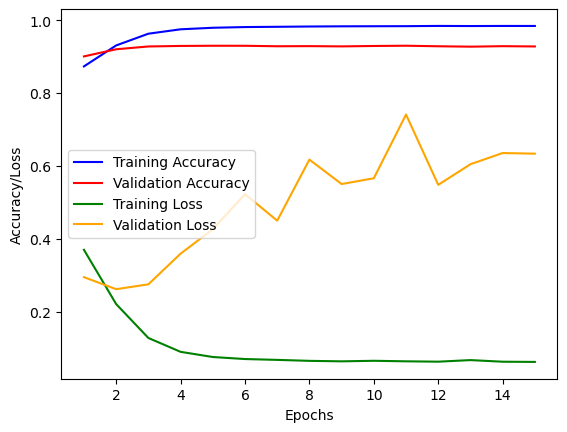

In [21]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')


plt.plot(np.arange(1 , 16, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')


plt.plot(np.arange(1 , 16, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

plt.plot(np.arange(1 , 16, 1),
        training_history.history['loss'], 
        label = 'Training Loss',
         color = 'green')
plt.plot(np.arange(1 , 16, 1),
         training_history.history['val_loss'], 
         label = 'Validation Loss',
         color = 'orange')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [22]:
from sklearn.metrics import classification_report
test_pred = model.predict(X_test)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis=1)

print("Classifiation report of CNN\n", classification_report(y_test_class, test_pred_class))
print("Confusion matrix of CNN:\n")

pd.crosstab(y_test_class,test_pred_class, rownames=['Real sentiment'], colnames=['Predicted sentiment'])

2038/2038 [==============================] - 12s 6ms/step
Classifiation report of CNN
               precision    recall  f1-score   support

           0       0.92      0.89      0.90     15653
           1       0.81      0.59      0.68      5012
           2       0.94      0.98      0.96     44546

    accuracy                           0.93     65211
   macro avg       0.89      0.82      0.85     65211
weighted avg       0.93      0.93      0.92     65211

Confusion matrix of CNN:



Predicted sentiment,0,1,2
Real sentiment,,,
0,13880,338,1435
1,671,2955,1386
2,537,333,43676
